In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import quantecon as qe
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA

In [3]:
precios = pd.read_csv('/home/alvin/Desktop/Python/Precios.csv')

In [4]:
date = pd.date_range(start='01/01/1998', end='01/01/2019', freq='Q')
precios.index = date
precios = precios.drop(['t'], axis=1)


In [5]:
precios.head()

,precio
1998-03-31,2549.465088
1998-06-30,2388.010742
1998-09-30,2470.224365
1998-12-31,2586.062012
1999-03-31,2942.189941


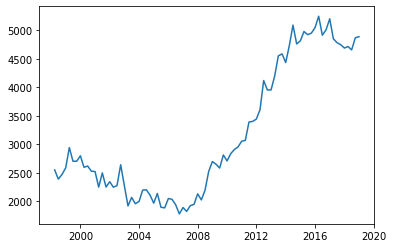

In [6]:
plt.plot(precios);

In [7]:
test_DF = sm.tsa.stattools.adfuller(precios.precio.dropna(), regression='ct')
print('ADF Statistic: %f' % test_DF[0])
print('p-value: %f' % test_DF[0])
print('Critical Values:')
for key, value in test_DF[4].items():
    print('\t%s: %.3f' % (key,value))
    
if test_DF[0] < test_DF[4]['5%']:
    print('Reject Ho - Time series is Stationary')
else:
    print('Failed to Reject Ho - Times series Non-Stationary')

ADF Statistic: -2.406369
p-value: -2.406369
Critical Values:
	1%: -4.078
	5%: -3.468
	10%: -3.160
Failed to Reject Ho - Times series Non-Stationary


In [11]:
precios['log_precio'] = np.log(precios.precio)
precios['log_precio_diff'] = precios.log_precio.pct_change()
precios['asdf'] = precios.precio.pct_change()
precios

,precio,log_precio,log_precio_diff,asdf
1998-03-31,2549.465088,7.843639,NaN,NaN
1998-06-30,2388.010742,7.778216,-0.008341,-0.063329
1998-09-30,2470.224365,7.812064,0.004352,0.034428
1998-12-31,2586.062012,7.857892,0.005866,0.046894
1999-03-31,2942.189941,7.986909,0.016419,0.137711
...,...,...,...,...
2017-12-31,4691.332031,8.453472,-0.001463,-0.012307
2018-03-31,4717.530762,8.459041,0.000659,0.005584
2018-06-30,4658.514648,8.446452,-0.001488,-0.012510
2018-09-30,4872.266113,8.491314,0.005311,0.045884


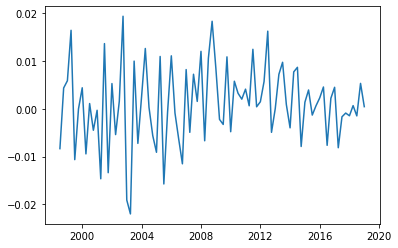

In [12]:
plt.plot(precios.log_precio_diff);

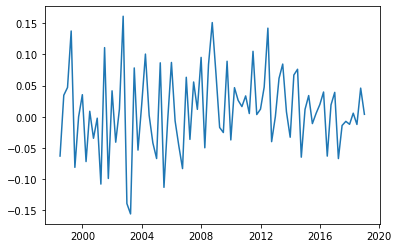

In [13]:
plt.plot(precios.asdf)

In [9]:
test_DF = sm.tsa.stattools.adfuller(precios.log_precio_diff.dropna(), regression='c')
# mientas más a la izquierda es mejor
# Si la series ya es estacionaria, no hay más que hacer
print('ADF Statistic: %f' % test_DF[0])
print('p-value: %f' % test_DF[0])
print('Critical Values:')
for key, value in test_DF[4].items():
    print('\t%s: %.3f' % (key,value))
    
if test_DF[0] < test_DF[4]['5%']:
    print('Reject Ho - Time series is Stationary')
else:
    print('Failed to Reject Ho - Times series Non-Stationary')

ADF Statistic: -10.961181
p-value: -10.961181
Critical Values:
	1%: -3.513
	5%: -2.897
	10%: -2.586
Reject Ho - Time series is Stationary


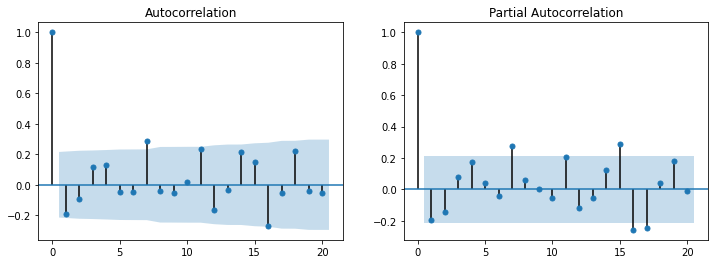

In [10]:
# Gráfica de los residuos
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

# ACF chart
fig = sm.graphics.tsa.plot_acf(precios.log_precio_diff.dropna(), ax=ax1)
# PACF chart
fig = sm.graphics.tsa.plot_pacf(precios.log_precio_diff.dropna(), ax=ax2)
# ignorar el primero

In [75]:
mod = ARMA(precios.log_precio_diff.dropna(), order=(0,7))
result = mod.fit()
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:        log_precio_diff   No. Observations:                   83
Model:                     ARMA(0, 7)   Log Likelihood                 286.095
Method:                       css-mle   S.D. of innovations              0.008
Date:                Sun, 31 May 2020   AIC                           -554.190
Time:                        11:11:01   BIC                           -532.420
Sample:                    06-30-1998   HQIC                          -545.444
                         - 12-31-2018                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0011      0.001      1.185      0.236      -0.001       0.003
ma.L1.log_precio_diff    -0.2150      0.109     -1.975      0.048      -0.428      -0.002
ma.L2.lo

In [76]:
# luego sacar la gráfica de acf y pacf de los residuos del resultado
# es un ar(7) puro